<p><img src="https://github.com/heyrobin/song-popularity-prediction/blob/main/Banner.gif?raw=true"></p>

# <center> <mark>Importing Libraries and Dataset</mark>

<div class="intro" id = "title">
    
<p>Hello there, Another amazing competition about song popularity prediction. In this noteobook I will explore and vizsualize the dataset and try to plot it in beautiful way as possible. I will further upload this notebook.</p>

<p>Thankyou for MLSpace for this tabular ml community compitition.</p>
    
 </div>

In [1]:
from IPython.core.display import display, HTML, Javascript

html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
    
    <style>
    
mark {
  Font-Family: 'Playfair Display', Serif;
  
  background: #EBECE4;
  font-weight: bold;
  color: black;
  text-align: center;
  font-size:25px;
  justify-content: center;
}

.intro{
    font-family: 'Rubik', sans-serif;
    font-style: italic;
    text-align:center;
    font-size:15px;
    color:#696969;
    letter-spacing:0.5px;
    
    display:fill;
    background-color:#EBECE4;
    padding: 0.8em;
    
         
}
    
.strip{
    Font-Family: 'Playfair Display', Serif;
    font-style: italic;
    font-weight: bold;
    background:#EBECE4;
    color:black;
    text-align: center;
    font-size:30px;
    }
    
.section{
    Font-Family: 'Source Sans Pro', Sans-Serif;
    font-weight: bold;
    font-size:20px;
    color:#a02933;
}



.notes {
       padding: 1rem;
       width: 600px;
       0 5px 15px 0 rgba(0,0,0,0.08);
       
       background-color:#EBECE4;
       font-size:15px;
       font-family: 'Playfair Display', Serif;
       font-weight: none;
       letter-spacing:0.5px;
       text-align: left;
       border-width: 2px;
       color:#696969;
  
}

hr { border: 0.2px solid ;border-style: inset;
  border-width: 1px;
           }
    
    
    </style>
    </head>
    
</html>
"""

HTML(html_contents)

In [2]:
# numbers and dataframe
import numpy as np 
import pandas as pd


import warnings; warnings.filterwarnings('ignore')

#visuals
import matplotlib.pyplot as plt
import seaborn as sns

#viz parameters
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.3
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams["font.family"] = "monospace";

#theme and colors
theme1 = ["#817EA9","#DF5B56"]
heatmap = ['#D75A61','#34A4D1','#71B9C9','#94CE63','#F79C22']

In [3]:
df = pd.read_csv('../input/song-popularity-prediction/train.csv')
testdf = pd.read_csv('../input/song-popularity-prediction/test.csv')

df.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [4]:
print(f'The dataset got {df.shape[0]} rows and {df.shape[1]} columns')

The dataset got 40000 rows and 15 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


<div class="notes">after observing there are int and floats, we can spot some null values too.</div>

In [6]:
df.isna().sum()

id                     0
song_duration_ms    4101
acousticness        3992
danceability        4026
energy              3975
instrumentalness    3985
key                 4065
liveness            4086
loudness            3957
audio_mode             0
speechiness            0
tempo                  0
time_signature         0
audio_valence          0
song_popularity        0
dtype: int64

<div class="notes">We have 8 columns with null values in them.</div>

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,40000.0,19999.500000,11547.149720,0.000000,9999.750000,19999.500000,29999.250000,39999.000000
song_duration_ms,35899.0,193165.847572,45822.127679,25658.000000,166254.500000,186660.000000,215116.000000,491671.000000
acousticness,36008.0,0.276404,0.297928,-0.013551,0.039618,0.140532,0.482499,1.065284
danceability,35974.0,0.570951,0.190010,0.043961,0.424760,0.608234,0.718464,0.957131
energy,36025.0,0.683932,0.212662,-0.001682,0.539276,0.704453,0.870503,1.039741
instrumentalness,36015.0,0.036527,0.150024,-0.004398,0.000941,0.001974,0.003225,1.075415
key,35935.0,5.042605,3.372728,0.000000,2.000000,5.000000,8.000000,11.000000
liveness,35914.0,0.198514,0.151670,0.027843,0.111796,0.135945,0.212842,1.065298
loudness,36043.0,-7.407596,3.877198,-32.117911,-9.578139,-6.345413,-4.620711,-0.877346
audio_mode,40000.0,0.321150,0.466924,0.000000,0.000000,0.000000,1.000000,1.000000


<hr>

# <center> <mark>Exploritory Data Analysis</mark>

### Missing Values

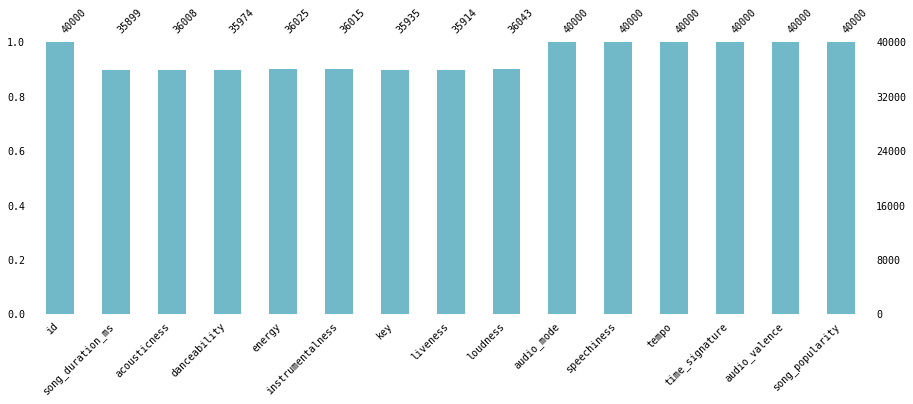

In [8]:
import missingno as msno
msno.bar(df,figsize=(15, 5),fontsize=10,color = heatmap[2]);

<div class="notes">We have 8 columns with null values in them.</div>

### Target Feature

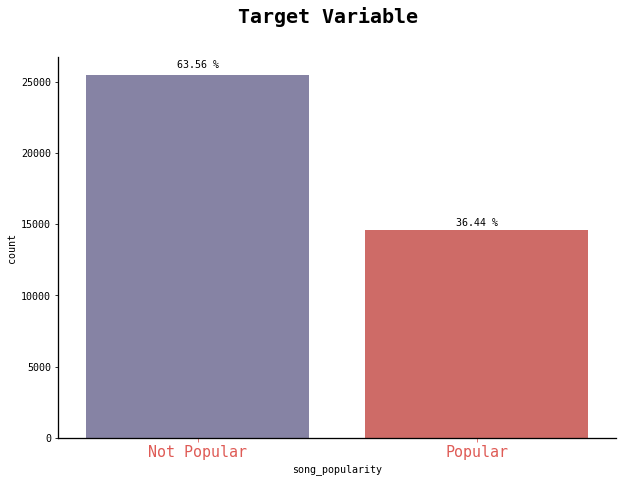

In [9]:
plt.suptitle('Target Variable', size = 20, weight='bold')

song_popularity = df['song_popularity'].map({0:'Not Popular', 1:'Popular'})
a = sns.countplot(data = df, x =song_popularity,palette=theme1)
plt.tick_params(axis="x", colors=theme1[1],labelsize=15)

for p in a.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    a.annotate(f'{height/df.shape[0]*100} %', (x + width/2, y + height*1.02), ha='center')

plt.show()

<div class="notes">There is imbalance in data 64 and 36 pecent</div>

In [10]:
cont = ['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'audio_valence']
cat = [ 'key', 'audio_mode', 'time_signature']

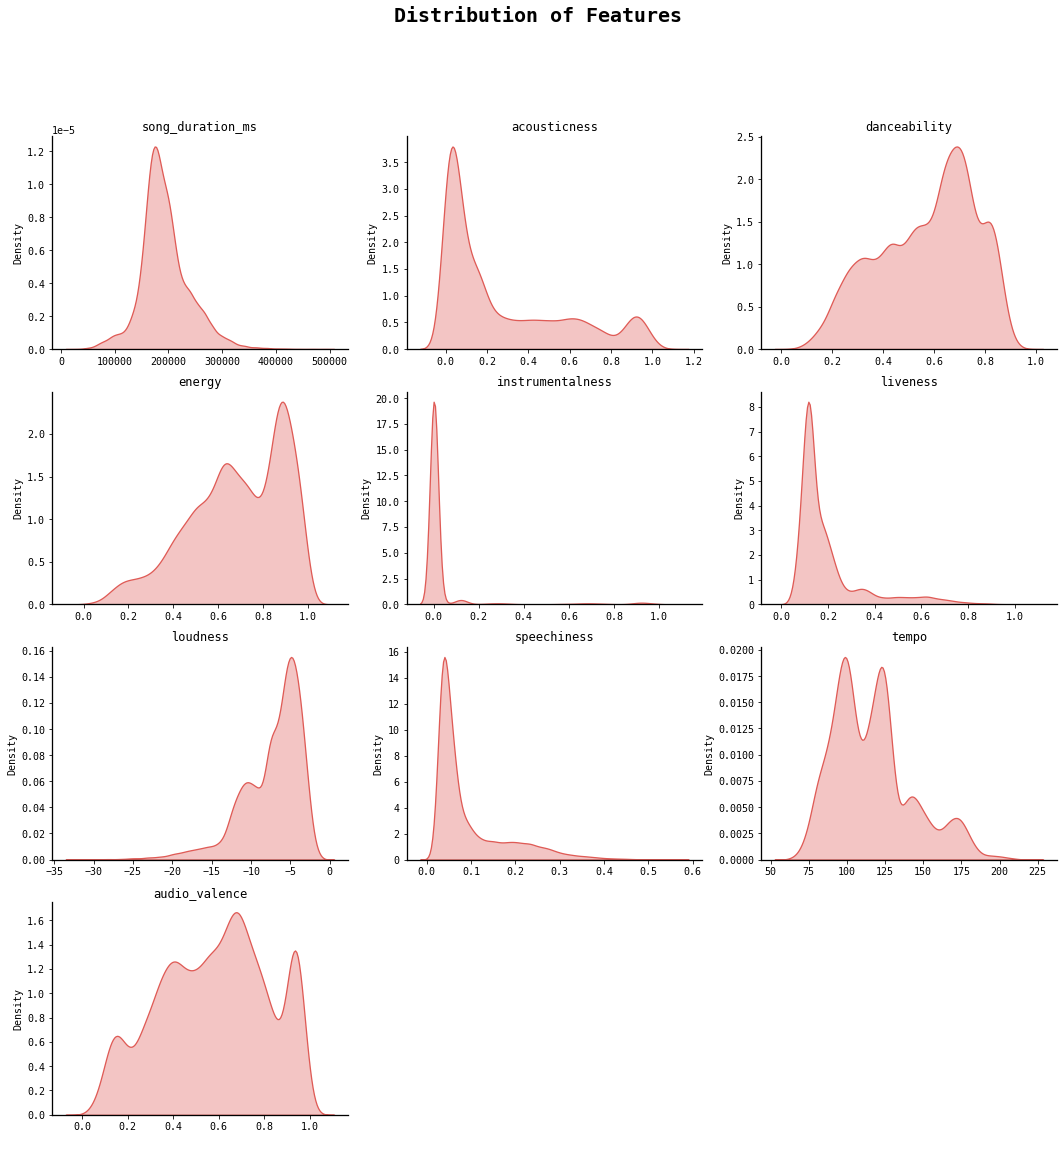

In [11]:
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

plt.figure(figsize= (18,18))

for i in cont:
        plt.suptitle('Distribution of Features', size = 20, weight='bold')
        
        plt.subplot(a, b, c)
       
        A=sns.kdeplot(df[i],color=theme1[1], linewidth = 1.3,shade=True, alpha=0.35)
        plt.title(i)
        plt.xlabel(" ")
        c = c + 1

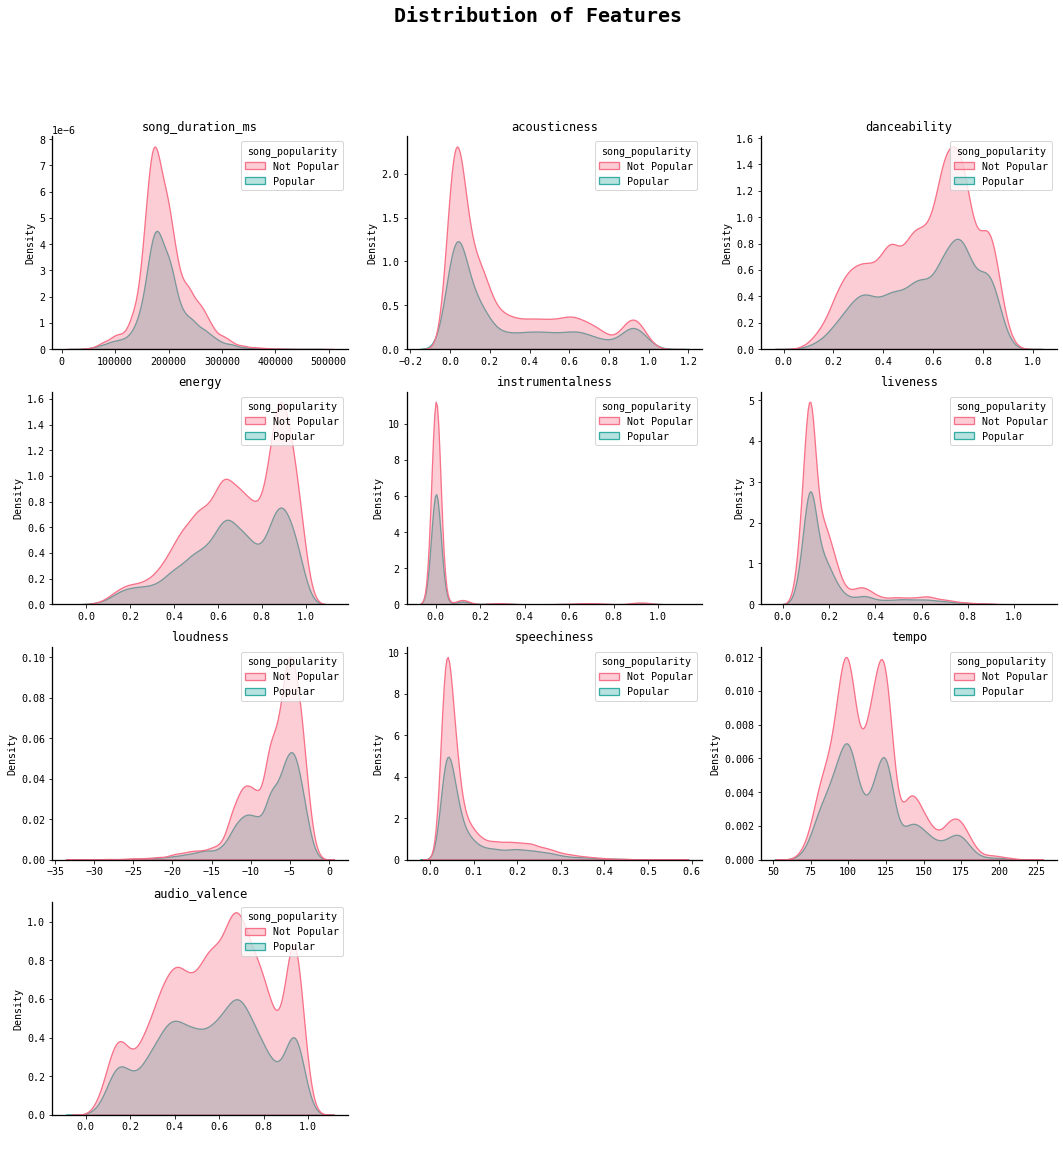

In [12]:
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

plt.figure(figsize= (18,18))

for i in cont:
        plt.suptitle('Distribution of Features', size = 20, weight='bold')
        plt.subplot(a, b, c)
        A=sns.kdeplot(data= df, x=i,hue=song_popularity,palette="husl", linewidth = 1.3,shade=True, alpha=0.35)
        plt.title(i)
        plt.xlabel(" ")
        c = c + 1

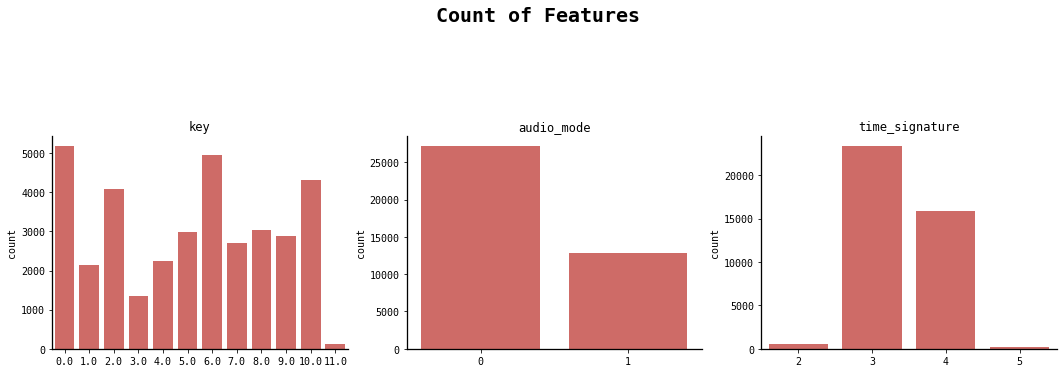

In [13]:
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

plt.figure(figsize= (18,18))
for i in cat:
        
        plt.suptitle('Count of Features', size = 20, weight='bold')
        
        plt.subplot(a, b, c)
        A=sns.countplot(df[i],color=theme1[1])
        plt.title(i)
        plt.xlabel(" ")
        plt.tick_params(axis="x", colors='black',labelsize=10)
        c = c + 1

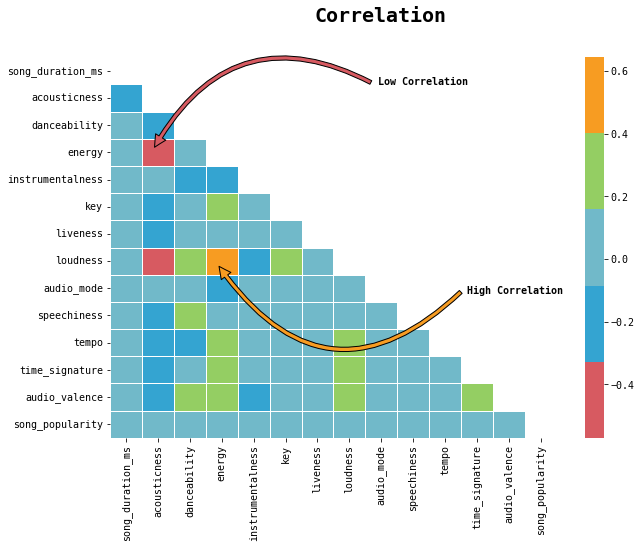

In [14]:
hm= df.drop('id', axis =1) 
mask = np.zeros_like(hm.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

plt.suptitle('Correlation', size = 20, weight='bold')

ax = sns.heatmap(hm.corr(), linewidths = 0.9, linecolor = 'white', cbar = True,mask=mask, cmap=heatmap)



ax.annotate('Low Correlation',
                    fontsize=10,fontweight='bold',
                    xy=(1.3, 3.5), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor=heatmap[0], shrink=0.025, 
                    connectionstyle='arc3, rad=0.50'),
                    horizontalalignment='left', verticalalignment='top'
)

ax.annotate('High Correlation',
                    fontsize=10,fontweight='bold',
                    xy=(3.3, 7.5), xycoords='data',
                    xytext=(0.8, 0.4), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor=heatmap[4], shrink=0.025, 
                    connectionstyle='arc3, rad=-0.6'),
                    horizontalalignment='left', verticalalignment='top'
)



plt.show()

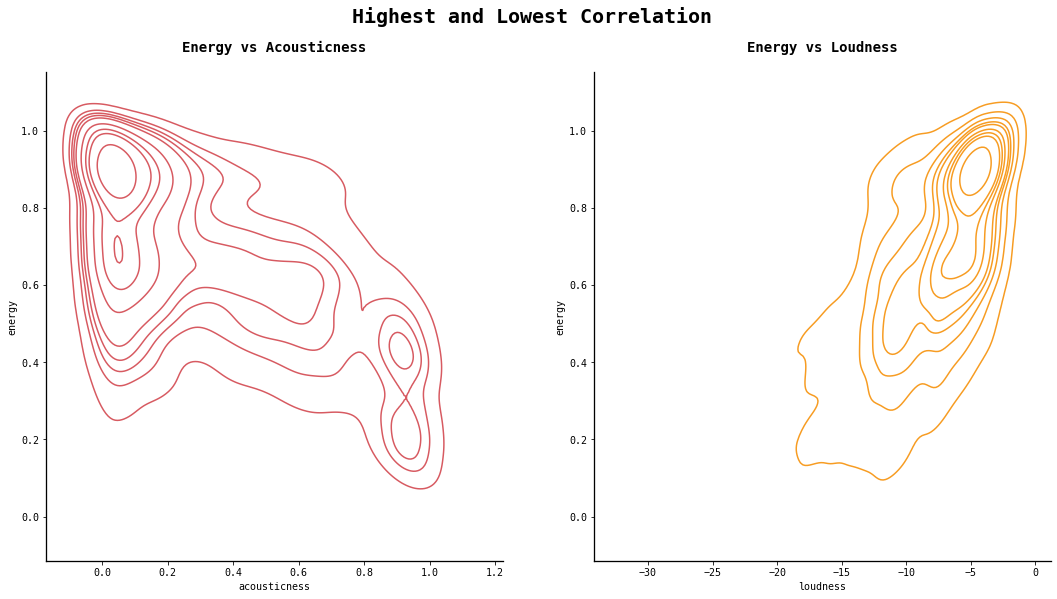

In [15]:
#plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
fig.suptitle(' Highest and Lowest Correlation ', size = 20, weight='bold')
axs = [ax1, ax2]

#kdeplot
sns.kdeplot(data=df, y='energy', x='acousticness', ax=ax1, color=heatmap[0])
ax1.set_title('Energy vs Acousticness', size = 14, weight='bold', pad=20)

#kdeplot
sns.kdeplot(data=df, y='energy', x='loudness', ax=ax2, color=heatmap[4])
ax2.set_title('Energy vs Loudness', size = 14, weight='bold', pad=20);

<div class="strip" id = "title">To be Continued...</div>